In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary

from model import UNet
from train import DDPM, train_fn
from scheduler import LinearScheduler, CosineScheduler
from utils import *

c:\Users\nemet\DeepLearning\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Hyperparameters
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
RANDOM_SEED = 42

BATCH_SIZE = 64
IMAGE_SIZE = 28
IMAGE_CHANNELS = 1
NUM_WORKERS = 2

In [3]:
transform = transforms.Compose(
    [   
        transforms.ToTensor(),
        transforms.Normalize((0.5), (0.5))
    ]
)

In [4]:
dataset = torchvision.datasets.MNIST(
    root="./data",
    transform=transform,
    download=True)

dataloader = DataLoader(
    dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS)

100%|██████████| 9912422/9912422 [00:00<00:00, 12343357.46it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 28773323.95it/s]

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw




100%|██████████| 1648877/1648877 [00:00<00:00, 8512316.83it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



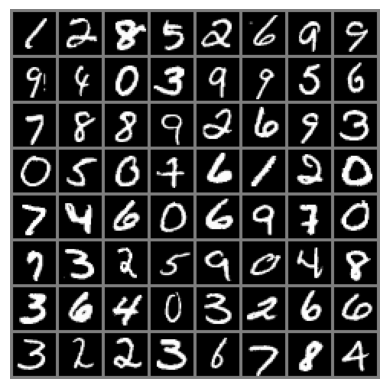

In [5]:
torch.manual_seed(RANDOM_SEED)

# get some random traning images
dataiter = iter(dataloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

In [6]:
torch.manual_seed(RANDOM_SEED)

model = UNet(
    image_channels=IMAGE_CHANNELS,
    features=[64, 128, 256],
).to(device=DEVICE)

summary(model)

Layer (type:depth-idx)                   Param #
├─ModuleList: 1-1                        --
|    └─Block: 2-1                        --
|    |    └─TimeEmbedding: 3-1           --
|    |    └─Sequential: 3-2              73,984
|    |    └─Conv2d: 3-3                  147,584
|    |    └─Sequential: 3-4              147,712
|    |    └─Sequential: 3-5              16,512
|    └─Block: 2-2                        --
|    |    └─TimeEmbedding: 3-6           --
|    |    └─Sequential: 3-7              295,424
|    |    └─Conv2d: 3-8                  590,080
|    |    └─Sequential: 3-9              590,336
|    |    └─Sequential: 3-10             33,024
├─ModuleList: 1-2                        --
|    └─Block: 2-3                        --
|    |    └─TimeEmbedding: 3-11          --
|    |    └─Sequential: 3-12             590,080
|    |    └─ConvTranspose2d: 3-13        147,584
|    |    └─Sequential: 3-14             147,712
|    |    └─Sequential: 3-15             16,512
|    └─Block: 2

Layer (type:depth-idx)                   Param #
├─ModuleList: 1-1                        --
|    └─Block: 2-1                        --
|    |    └─TimeEmbedding: 3-1           --
|    |    └─Sequential: 3-2              73,984
|    |    └─Conv2d: 3-3                  147,584
|    |    └─Sequential: 3-4              147,712
|    |    └─Sequential: 3-5              16,512
|    └─Block: 2-2                        --
|    |    └─TimeEmbedding: 3-6           --
|    |    └─Sequential: 3-7              295,424
|    |    └─Conv2d: 3-8                  590,080
|    |    └─Sequential: 3-9              590,336
|    |    └─Sequential: 3-10             33,024
├─ModuleList: 1-2                        --
|    └─Block: 2-3                        --
|    |    └─TimeEmbedding: 3-11          --
|    |    └─Sequential: 3-12             590,080
|    |    └─ConvTranspose2d: 3-13        147,584
|    |    └─Sequential: 3-14             147,712
|    |    └─Sequential: 3-15             16,512
|    └─Block: 2

In [7]:
# Hyperparameters
NOISE_STEPS = 500

LEARNING_RATE = 1e-4
NUM_EPOCHS = 20

In [8]:
noise_scheduler = CosineScheduler(NOISE_STEPS, device=DEVICE)

diffusion = DDPM(
    scheduler=noise_scheduler,
    image_size=IMAGE_SIZE,
    image_channels=IMAGE_CHANNELS,
    device=DEVICE)

In [9]:
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

loss_fn = nn.MSELoss()

Epoch: 0 / 20
-------


100%|██████████| 938/938 [01:44<00:00,  8.96it/s]


Train loss: 0.0761



499it [00:04, 115.45it/s]


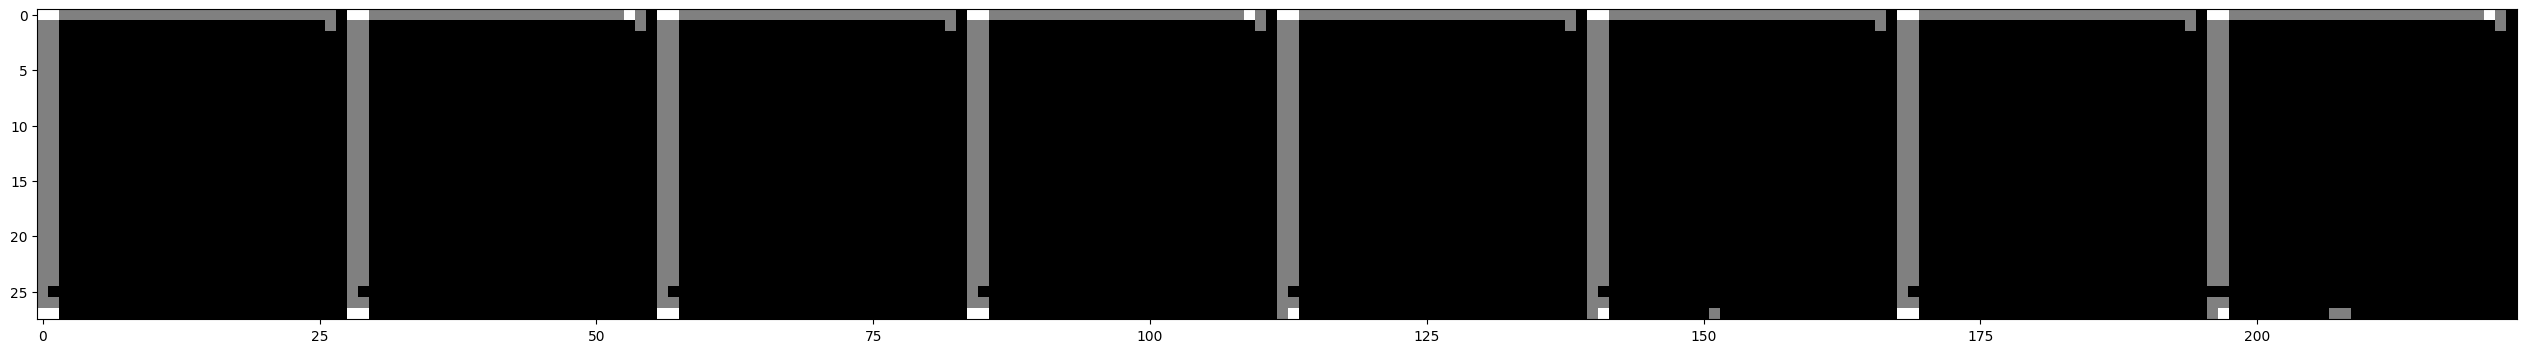

Epoch: 1 / 20
-------


100%|██████████| 938/938 [01:42<00:00,  9.11it/s]


Train loss: 0.0529



499it [00:04, 115.44it/s]


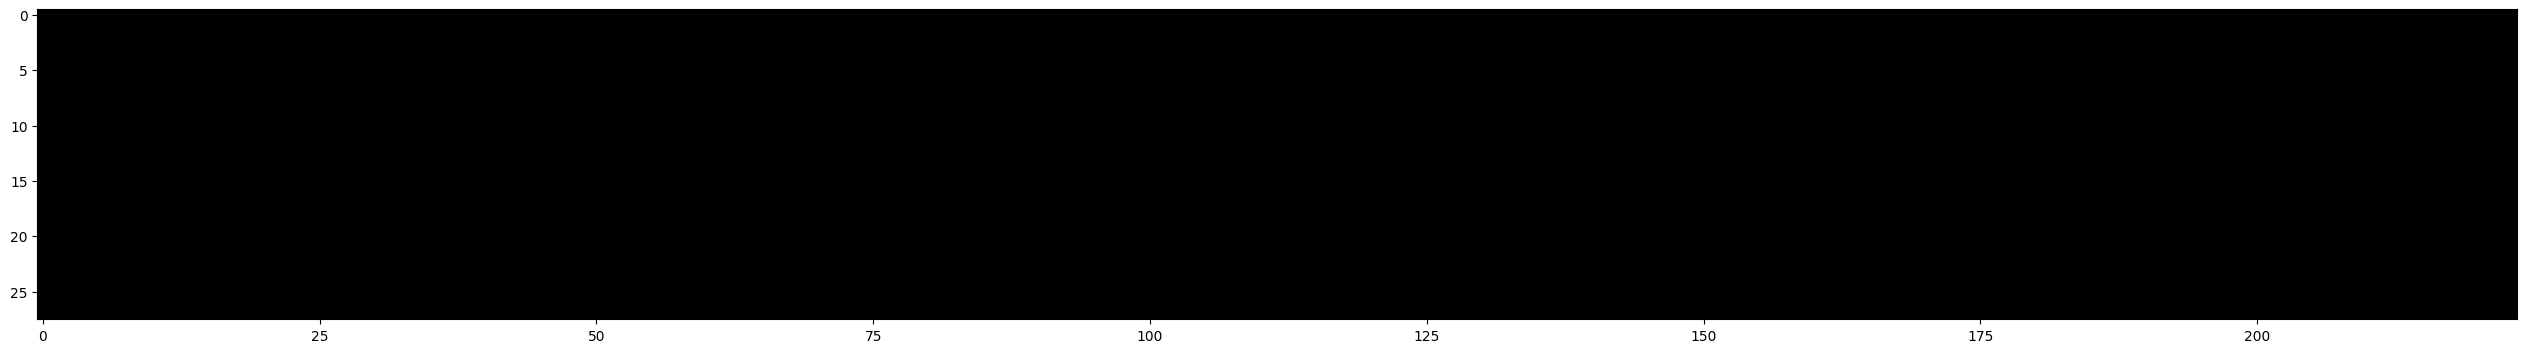

Epoch: 2 / 20
-------


100%|██████████| 938/938 [01:43<00:00,  9.03it/s]


Train loss: 0.0491



499it [00:04, 109.11it/s]


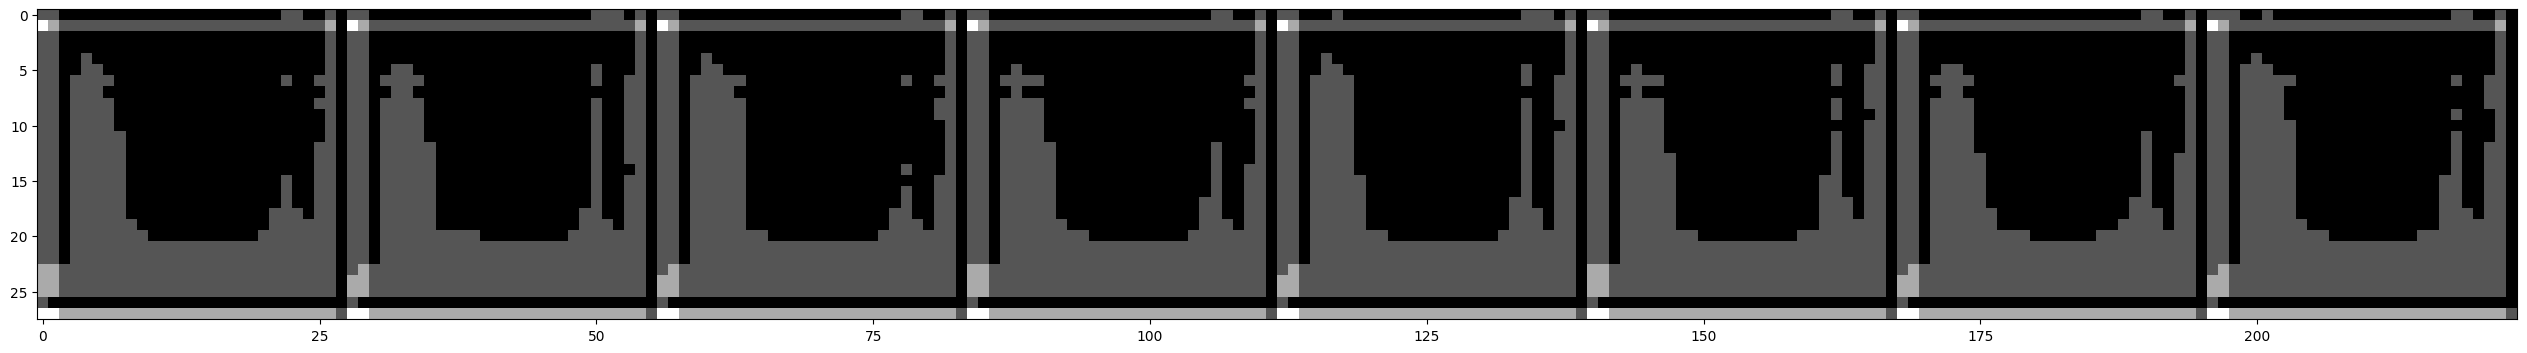

Epoch: 3 / 20
-------


100%|██████████| 938/938 [01:46<00:00,  8.84it/s]


Train loss: 0.0473



499it [00:04, 112.38it/s]


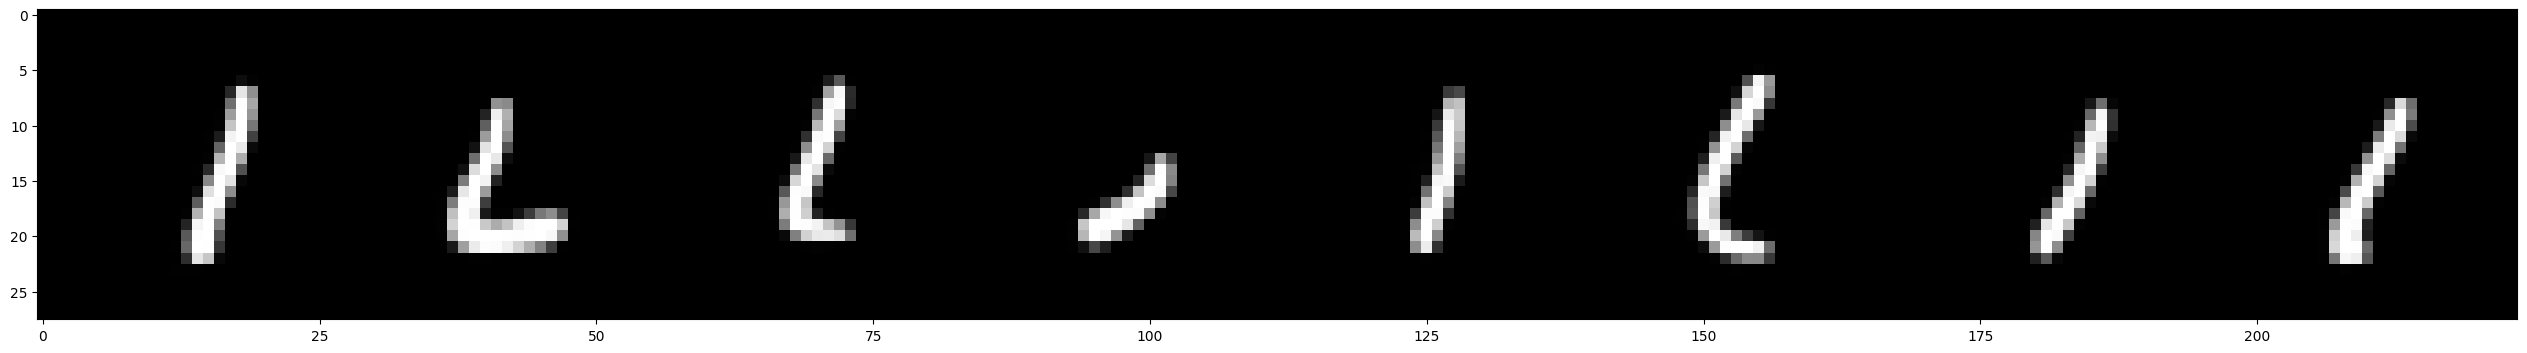

Epoch: 4 / 20
-------


100%|██████████| 938/938 [01:45<00:00,  8.93it/s]


Train loss: 0.0457



499it [00:04, 106.46it/s]


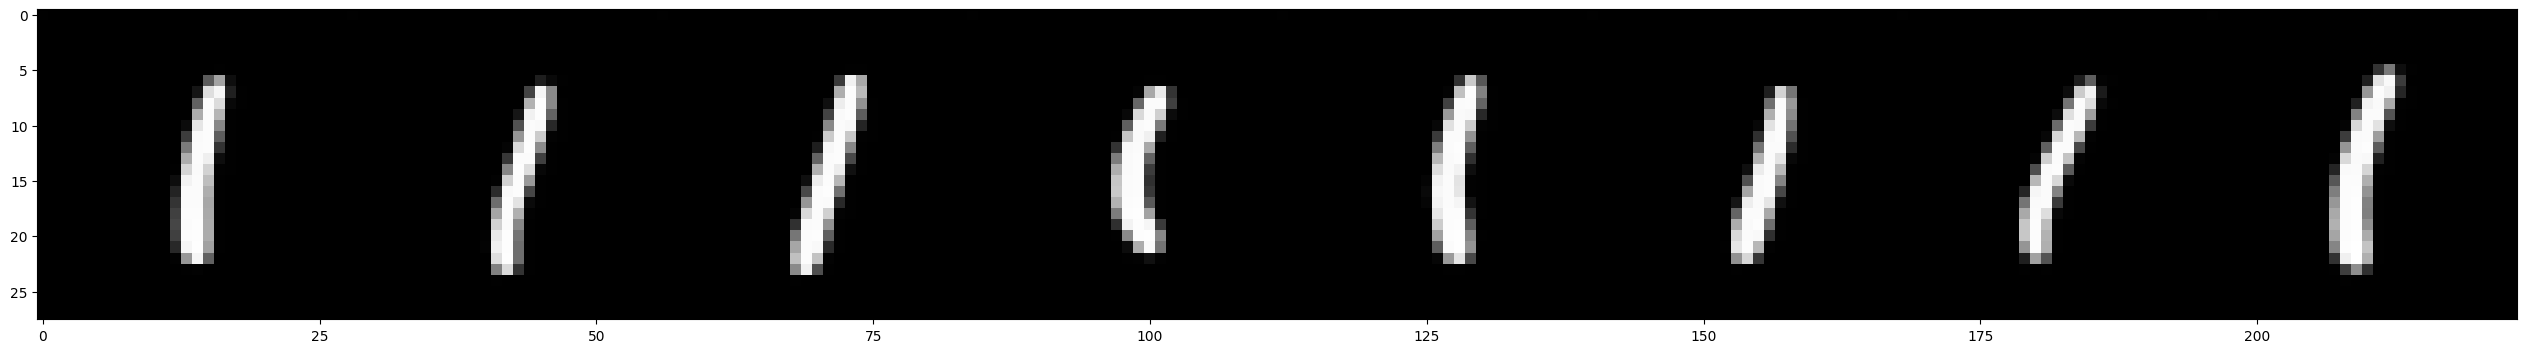

Epoch: 5 / 20
-------


100%|██████████| 938/938 [01:48<00:00,  8.62it/s]


Train loss: 0.0451



499it [00:04, 108.54it/s]


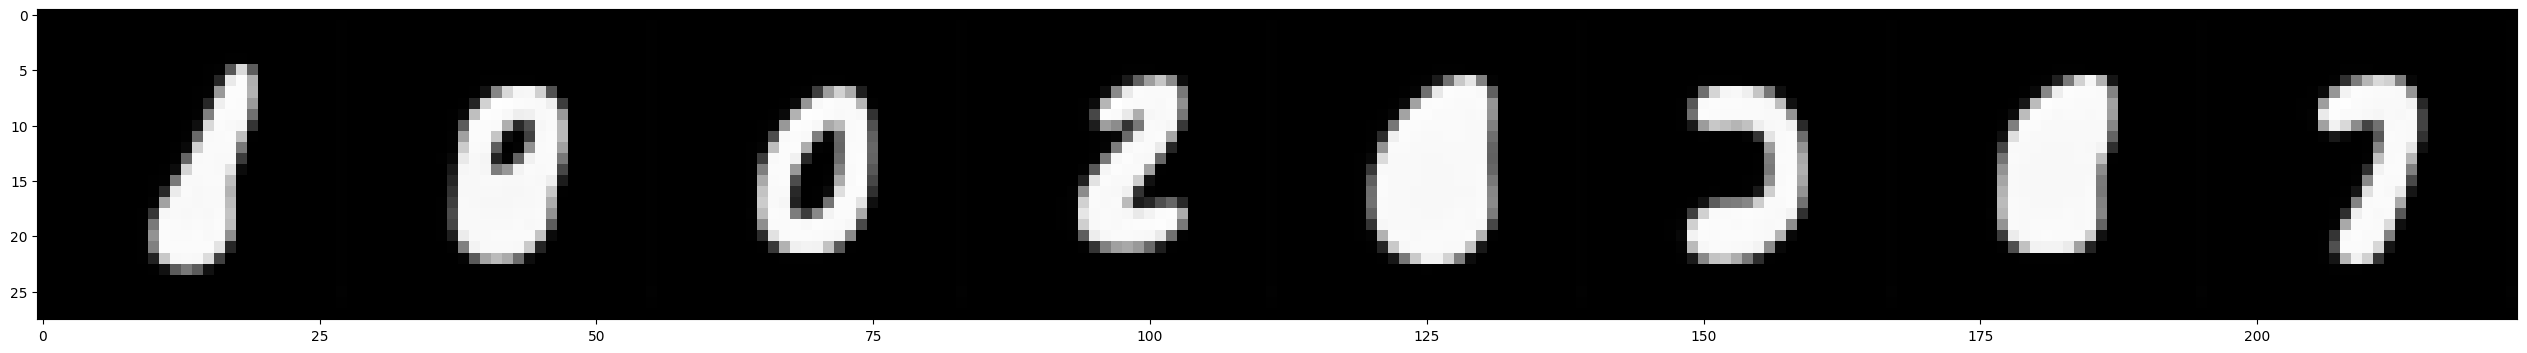

Epoch: 6 / 20
-------


100%|██████████| 938/938 [01:49<00:00,  8.58it/s]


Train loss: 0.0443



499it [00:05, 99.52it/s] 


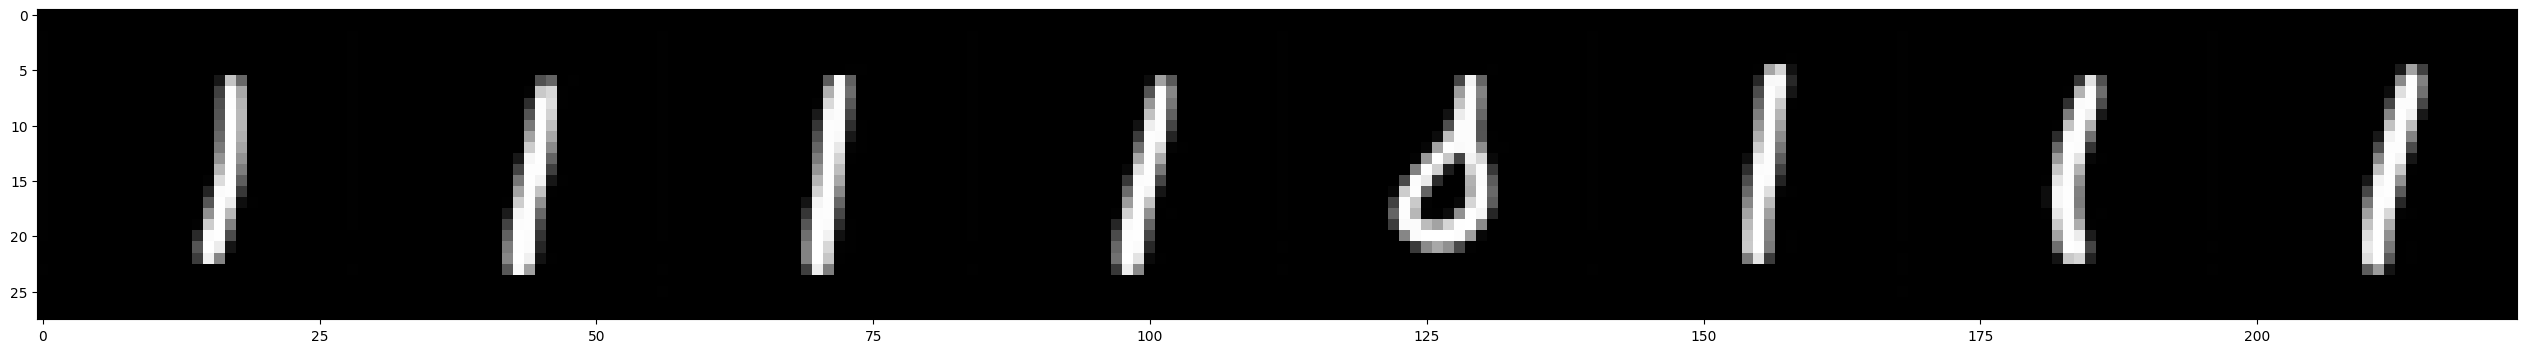

Epoch: 7 / 20
-------


100%|██████████| 938/938 [01:48<00:00,  8.65it/s]


Train loss: 0.0440



499it [00:04, 106.26it/s]


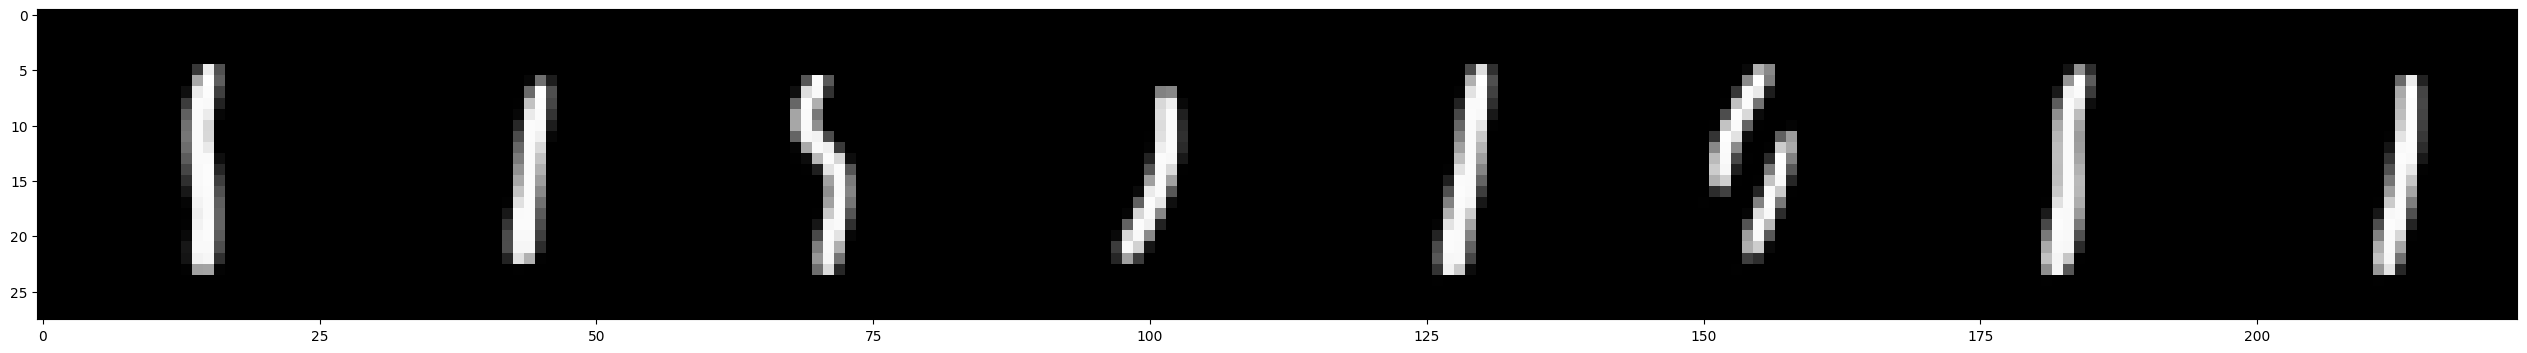

Epoch: 8 / 20
-------


100%|██████████| 938/938 [01:47<00:00,  8.76it/s]


Train loss: 0.0433



499it [00:04, 105.80it/s]


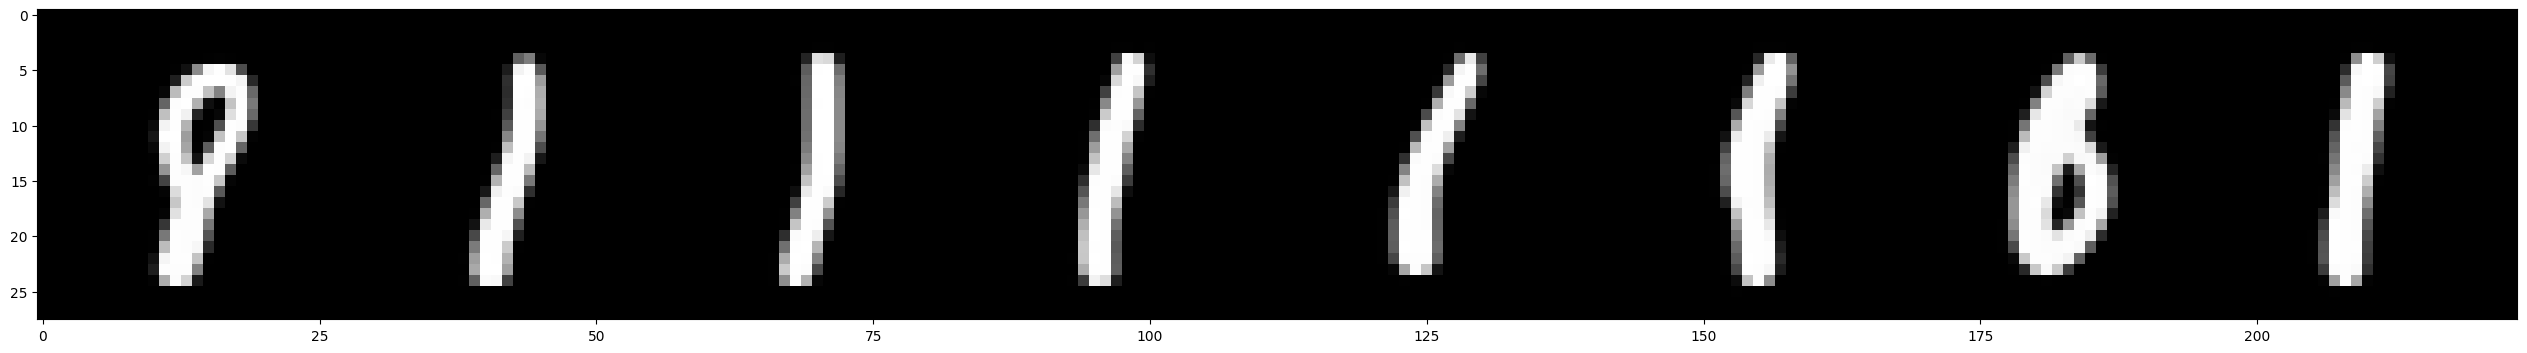

Epoch: 9 / 20
-------


100%|██████████| 938/938 [01:47<00:00,  8.75it/s]


Train loss: 0.0430



499it [00:04, 110.00it/s]


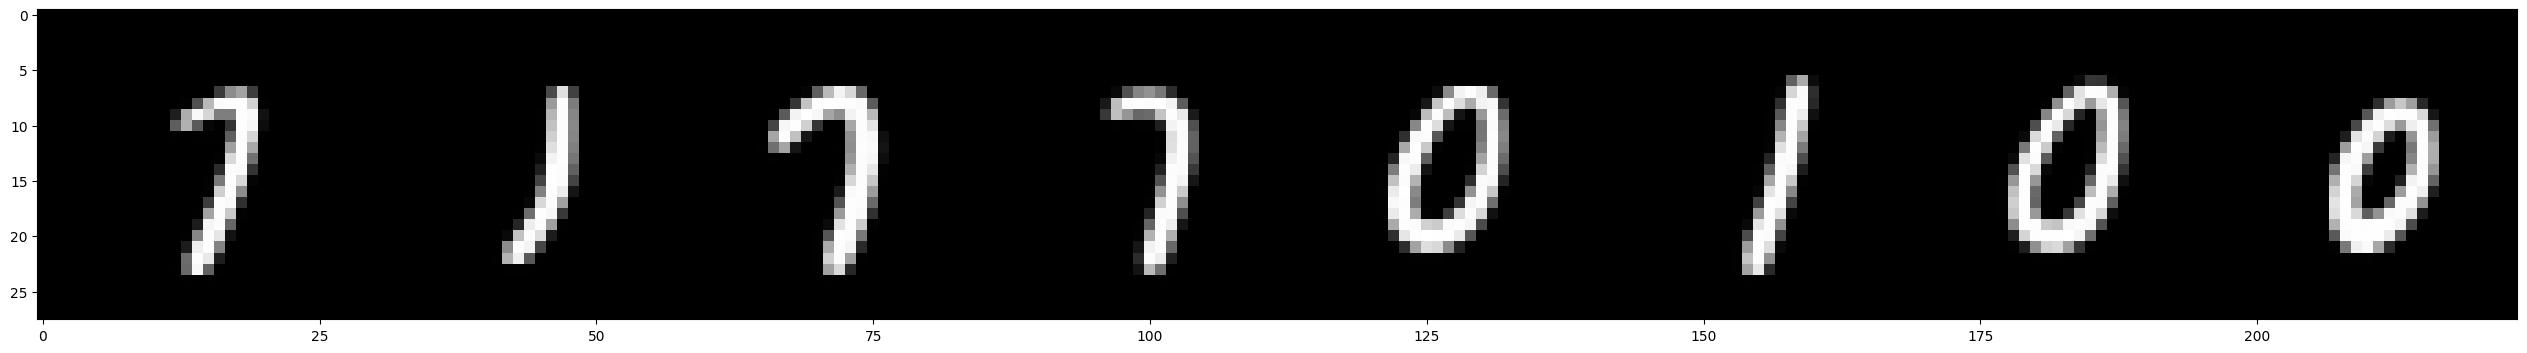

Epoch: 10 / 20
-------


100%|██████████| 938/938 [01:44<00:00,  8.96it/s]


Train loss: 0.0429



499it [00:04, 109.46it/s]


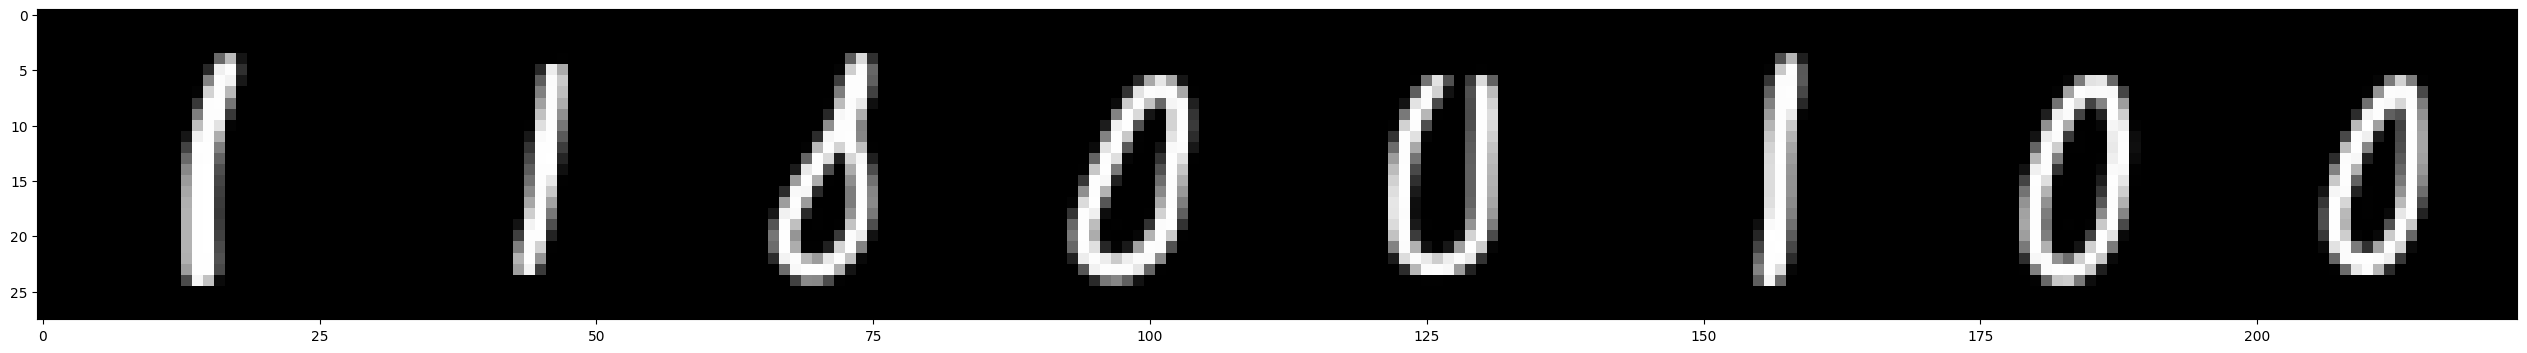

Epoch: 11 / 20
-------


100%|██████████| 938/938 [01:42<00:00,  9.12it/s]


Train loss: 0.0422



499it [00:04, 112.78it/s]


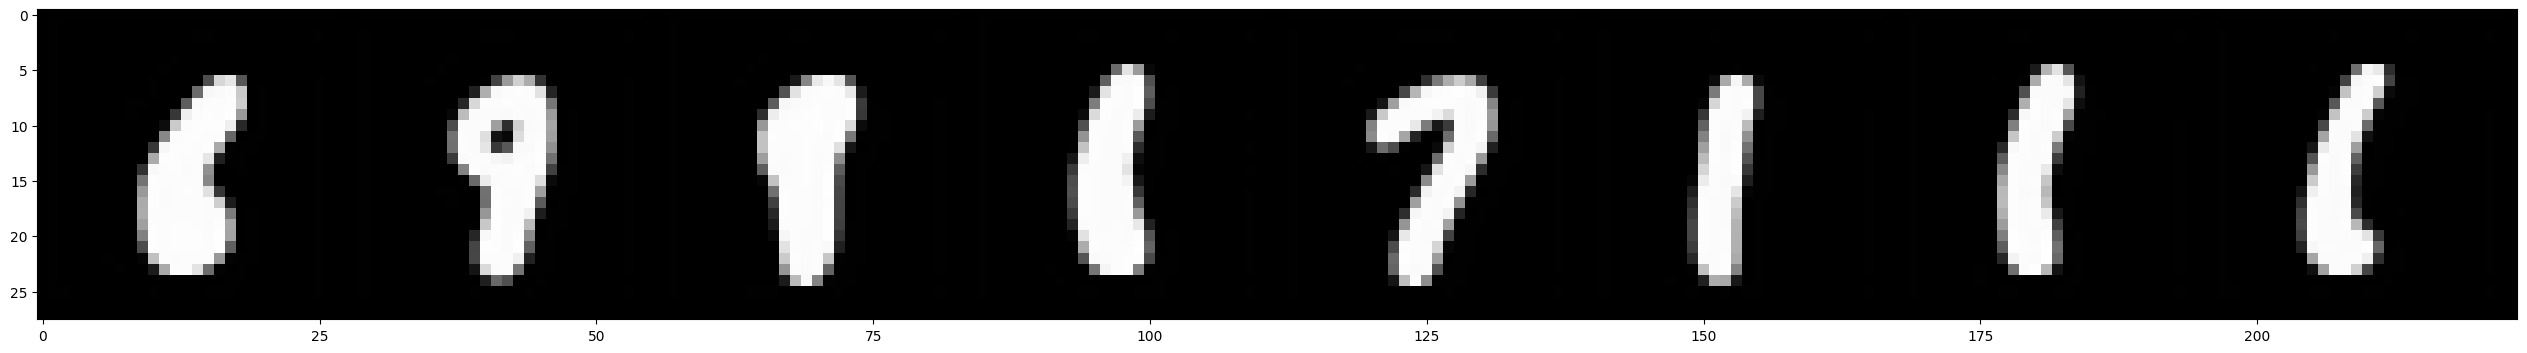

Epoch: 12 / 20
-------


100%|██████████| 938/938 [01:41<00:00,  9.22it/s]


Train loss: 0.0426



499it [00:04, 114.61it/s]


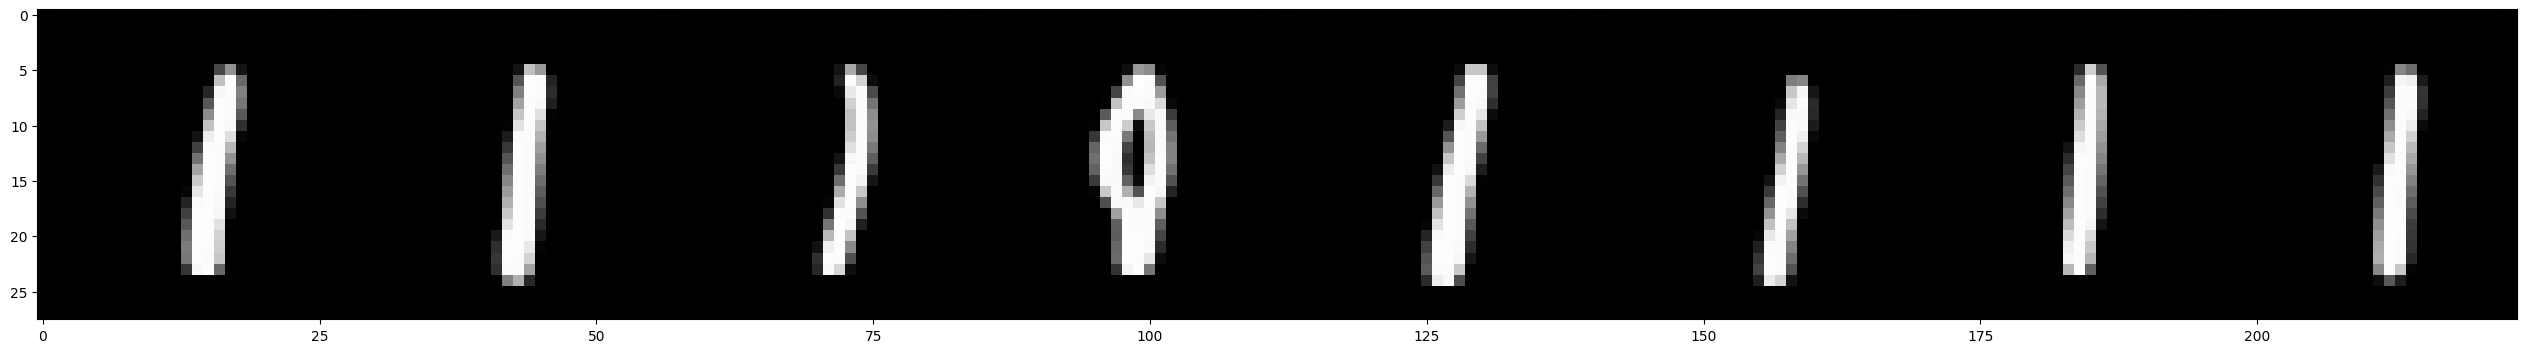

Epoch: 13 / 20
-------


100%|██████████| 938/938 [01:40<00:00,  9.31it/s]


Train loss: 0.0419



499it [00:04, 114.31it/s]


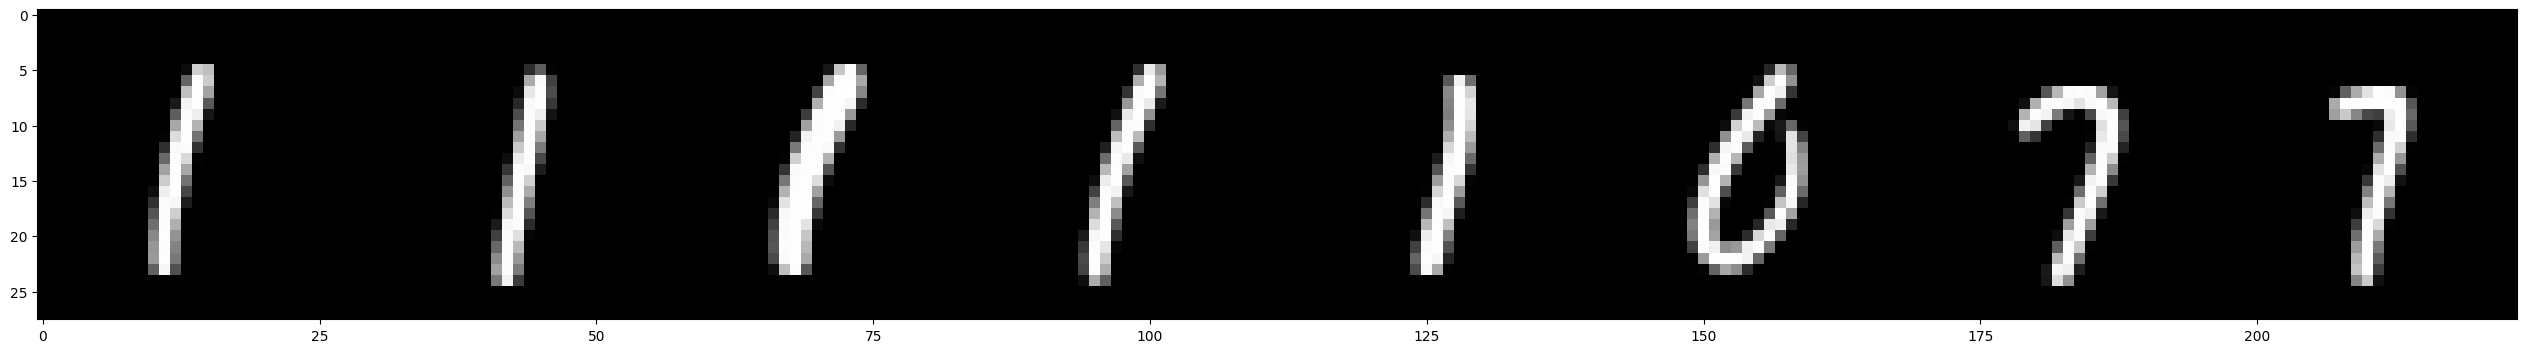

Epoch: 14 / 20
-------


100%|██████████| 938/938 [01:40<00:00,  9.32it/s]


Train loss: 0.0416



499it [00:04, 114.16it/s]


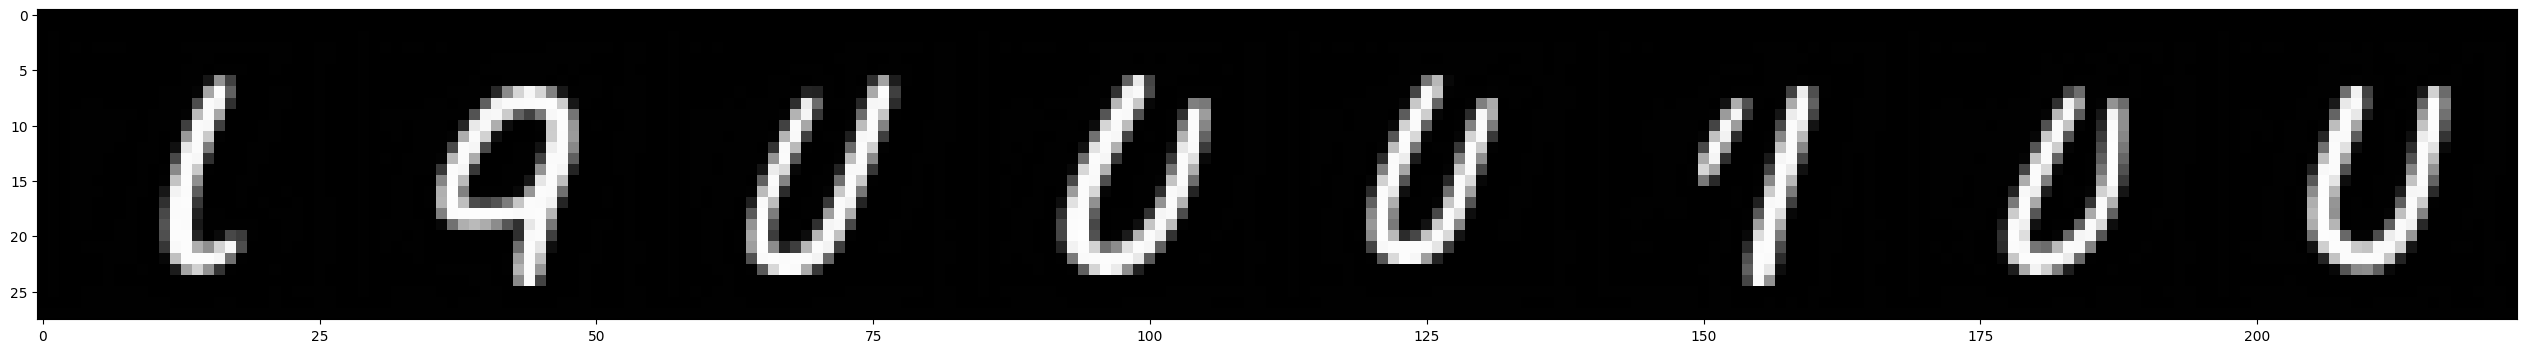

Epoch: 15 / 20
-------


100%|██████████| 938/938 [01:40<00:00,  9.30it/s]


Train loss: 0.0420



499it [00:04, 113.71it/s]


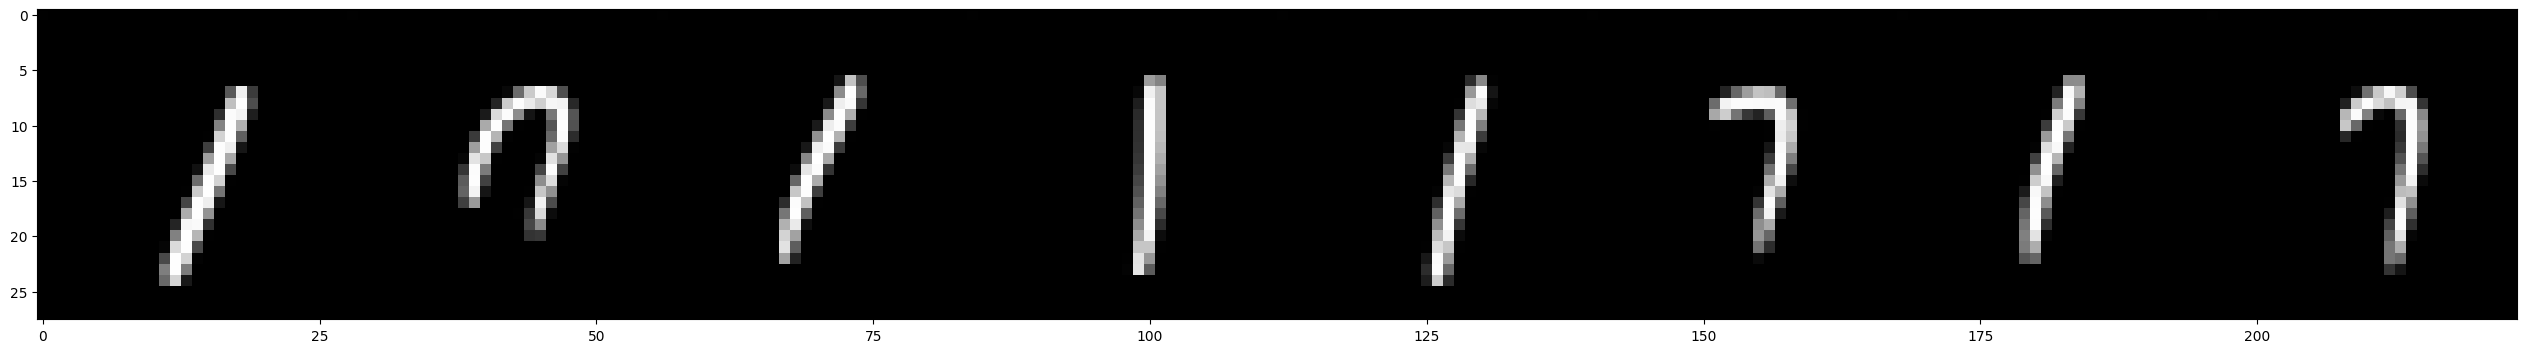

Epoch: 16 / 20
-------


100%|██████████| 938/938 [01:40<00:00,  9.31it/s]


Train loss: 0.0415



499it [00:04, 114.03it/s]


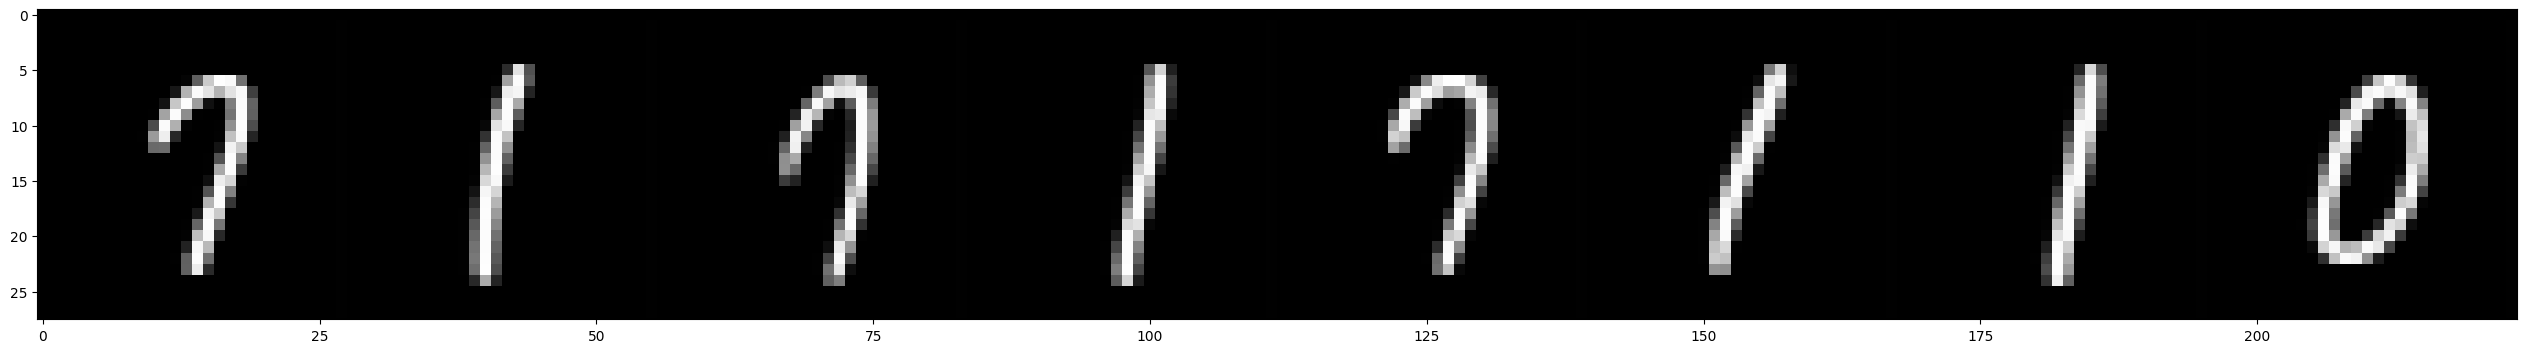

Epoch: 17 / 20
-------


100%|██████████| 938/938 [01:40<00:00,  9.31it/s]


Train loss: 0.0415



499it [00:04, 114.42it/s]


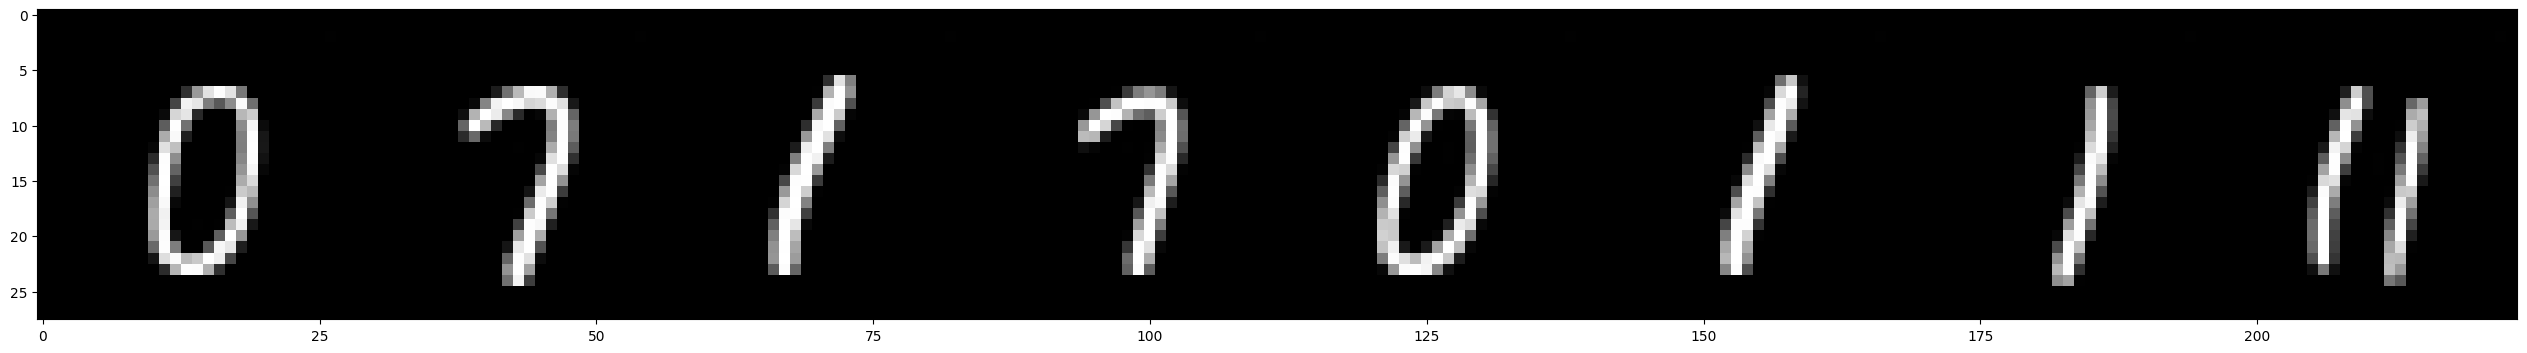

Epoch: 18 / 20
-------


100%|██████████| 938/938 [01:44<00:00,  8.99it/s]


Train loss: 0.0414



499it [00:04, 106.18it/s]


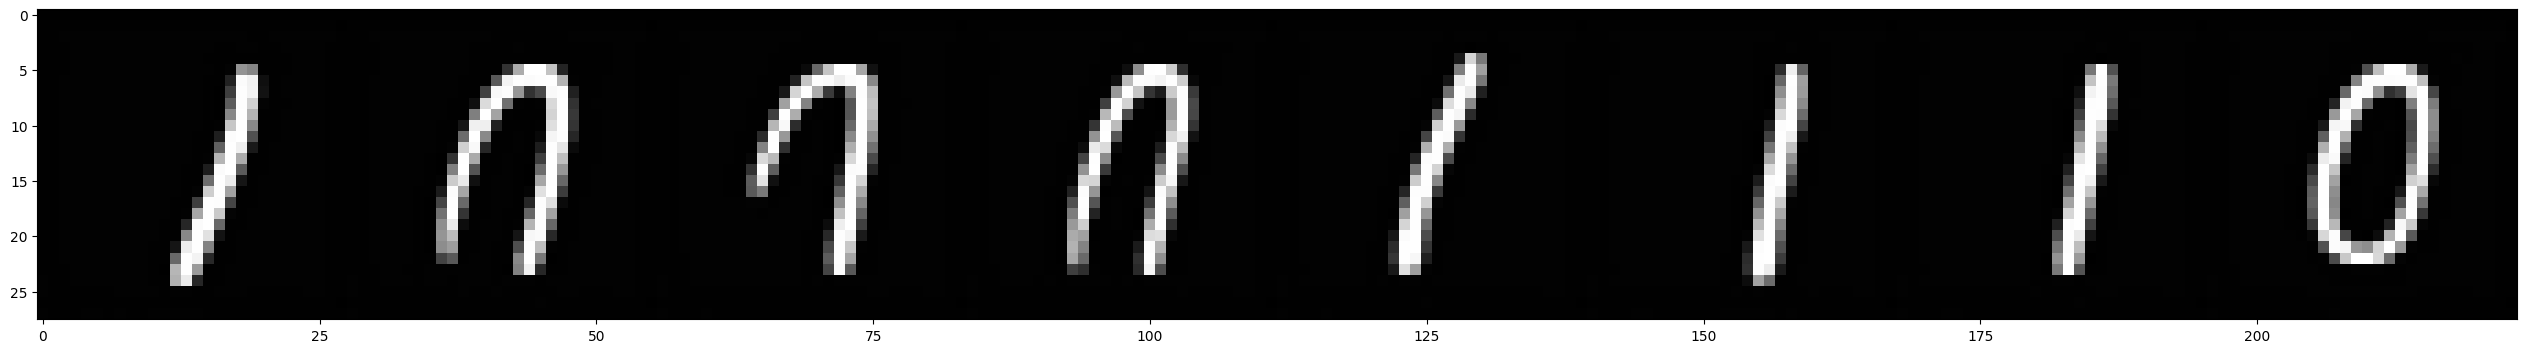

Epoch: 19 / 20
-------


100%|██████████| 938/938 [01:47<00:00,  8.74it/s]


Train loss: 0.0411



499it [00:04, 111.90it/s]


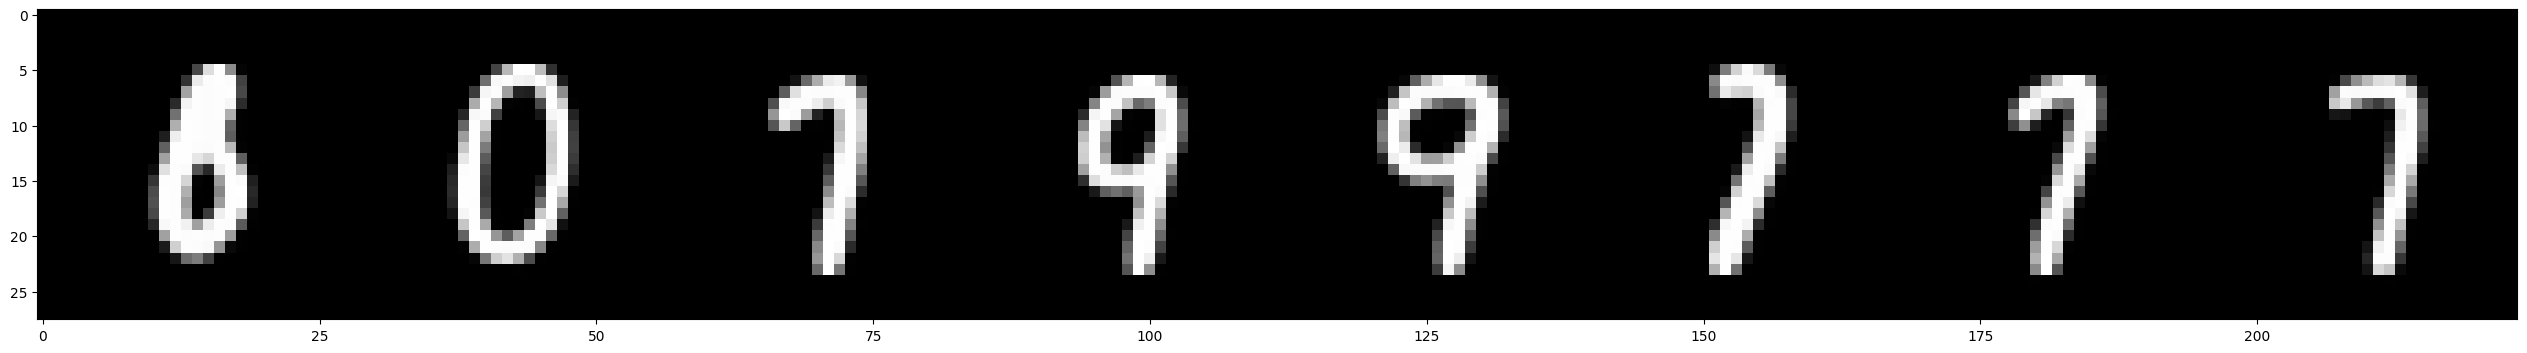

=> Saving checkpoint


In [9]:
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)


loss_history, learning_rates = train_fn(
    model, 
    diffusion,
    dataloader,
    optimizer,
    loss_fn,
    num_epochs=NUM_EPOCHS,
    device=DEVICE)

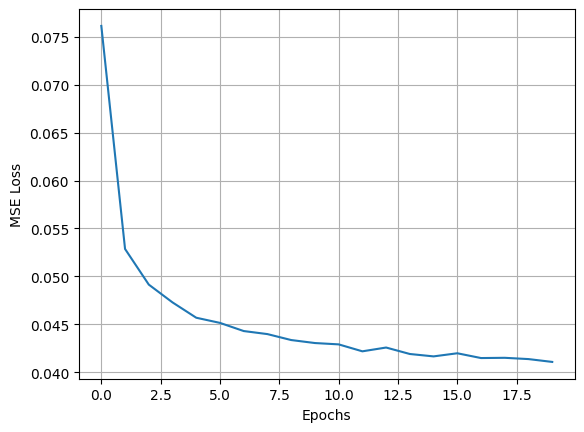

In [17]:
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.grid(True)

499it [00:04, 109.92it/s]


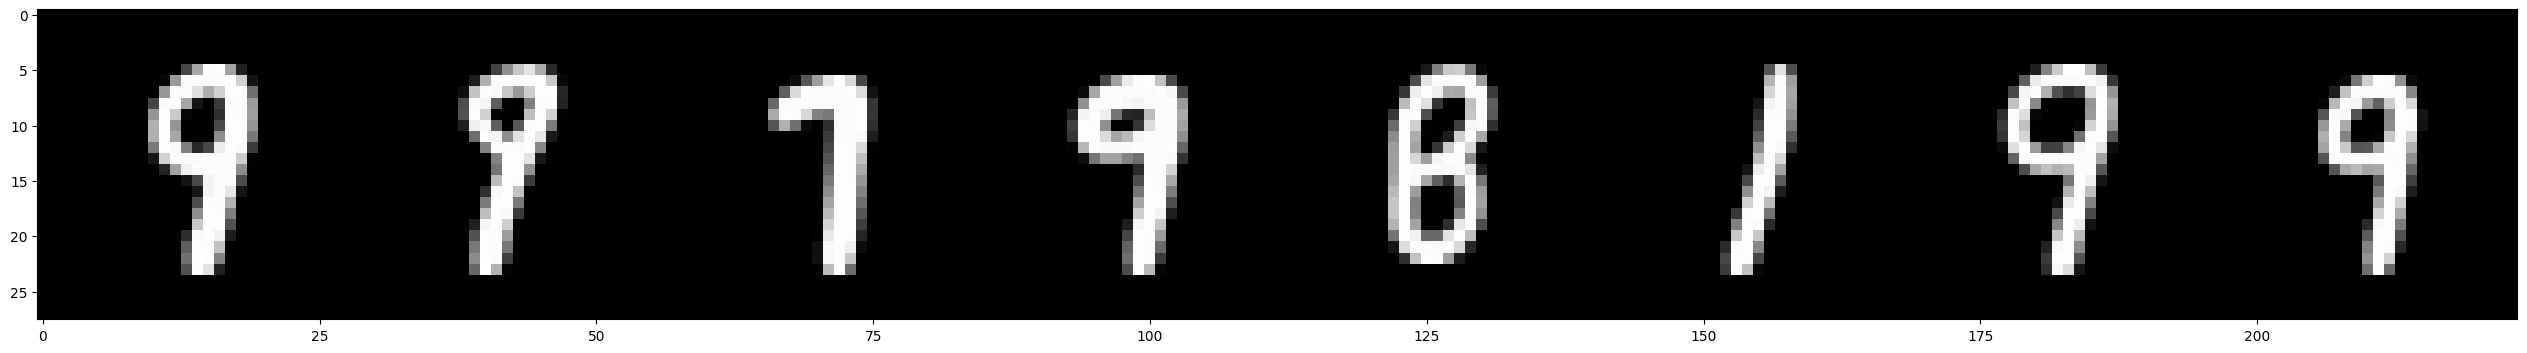

In [18]:
x = diffusion.sample(model, n=8)

plot_images(x, cmap="gray")

In [23]:
load_checkpoint(torch.load("checkpoint_202306191026.pth.tar"), model)

=> Loading checkpoint


499it [00:05, 84.41it/s]


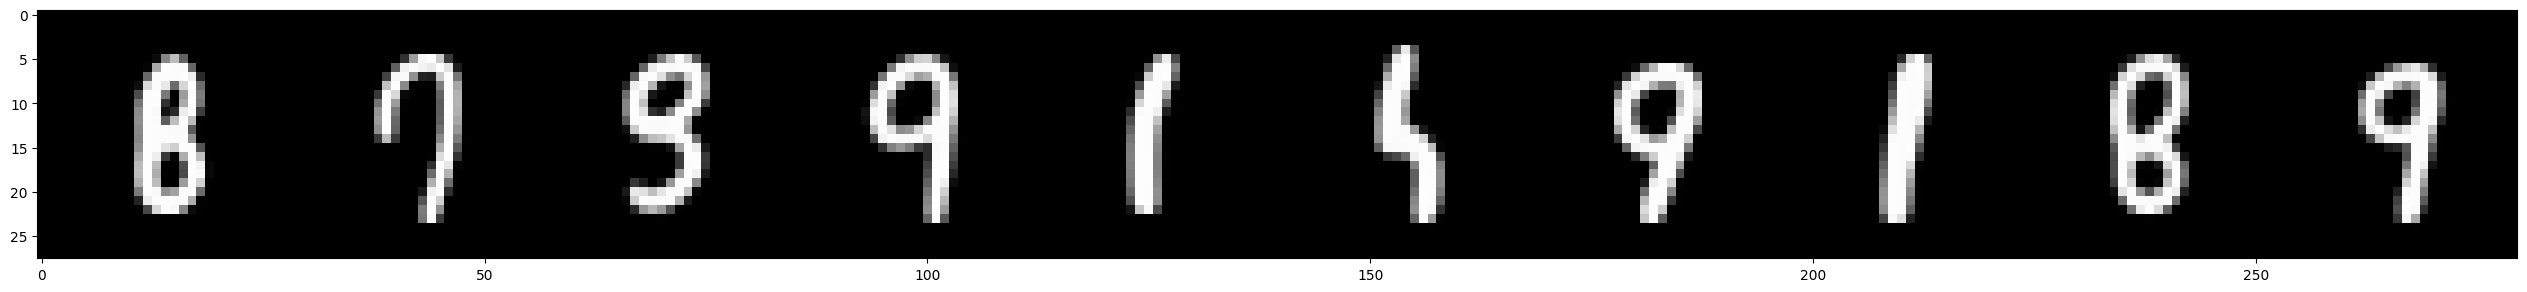

In [62]:
x = diffusion.sample(model, n=10)

plot_images(x, cmap="gray")